### In this notebook we will understand our data that we will be working on 

In [34]:
##IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

## Dev Databases 

It contains 11 databases in different domains,In each database folder, it has two components:
  -  **database_description**: the csv files are manufactured to describe database schema and its values for models to explore or references. Each csv file contains the description of columns for each table with columns : `original_column_name` ,`column_name` , `column_description` , `data_format` , `value_description` .
  -  **sqlite**: The database content.

Let's see one example of the csv files content:
Database: card_games
table: cards
 

In [3]:

pd.read_csv(
    "C:/Users/yousf/Bureau/ConvergenceAI/CHESS_Impl/data/dev_databases/card_games/database_description/cards.csv")


,original_column_name,column_name,column_description,data_format,value_description
0,id,unique id number identifying the cards,NaN,integer,NaN
1,artist,NaN,The name of the artist that illustrated the ca...,text,NaN
2,asciiName,ascii Name,The ASCII(opens new window) (Basic/128) code f...,text,NaN
3,availability,NaN,A list of the card's available printing types.,text,"""arena"", ""dreamcast"", ""mtgo"", ""paper"", ""shanda..."
4,borderColor,border Color,The color of the card border.,text,"""black"", ""borderless"", ""gold"", ""silver"", ""white"""
...,...,...,...,...,...
69,type,NaN,"The type of the card as visible, including any...",text,"""Artifact"", ""Card"", ""Conspiracy"", ""Creature"", ..."
70,types,NaN,"A list of all card types of the card, includin...",text,NaN
71,uuid,NaN,The universal unique identifier (v5) generated...,text,NOT USEFUL
72,variations,NaN,NaN,text,NaN


## Dev Set

In [8]:
dev = pd.read_json("C:/Users\yousf\Bureau\ConvergenceAI\CHESS_Impl\data\dev_set\dev.json")
dev

,question_id,db_id,question,evidence,SQL,difficulty
0,0,california_schools,What is the highest eligible free rate for K-1...,Eligible free rate for K-12 = `Free Meal Count...,SELECT `Free Meal Count (K-12)` / `Enrollment ...,simple
1,1,california_schools,Please list the lowest three eligible free rat...,Eligible free rates for students aged 5-17 = `...,SELECT `Free Meal Count (Ages 5-17)` / `Enroll...,moderate
2,2,california_schools,Please list the zip code of all the charter sc...,Charter schools refers to `Charter School (Y/N...,SELECT T2.Zip FROM frpm AS T1 INNER JOIN schoo...,simple
3,3,california_schools,What is the unabbreviated mailing street addre...,,SELECT T2.MailStreet FROM frpm AS T1 INNER JOI...,simple
4,4,california_schools,Please list the phone numbers of the direct ch...,Charter schools refers to `Charter School (Y/N...,SELECT T2.Phone FROM frpm AS T1 INNER JOIN sch...,moderate
...,...,...,...,...,...,...
1529,1529,debit_card_specializing,"What is the amount spent by customer ""38508"" a...",January 2012 refers to the Date value = '201201',"SELECT SUM(T1.Price) , SUM(IIF(T3.Date = '2012...",moderate
1530,1530,debit_card_specializing,Which are the top five best selling products? ...,Description of products contains full name,SELECT T2.Description FROM transactions_1k AS ...,simple
1531,1531,debit_card_specializing,Who is the top spending customer and how much ...,average price per single item = Total(price) /...,"SELECT T2.CustomerID, SUM(T2.Price / T2.Amount...",moderate
1532,1532,debit_card_specializing,Which country had the gas station that sold th...,,SELECT T2.Country FROM transactions_1k AS T1 I...,simple


- The dev.json file has :
    - `db_id`: the names of database
    - `question_id`: the id of the question
    - `question`: the questions curated by human crowdsourcing according to database descriptions, database contents.
    - `evidence`: the external knowledge evidence annotated by experts for assistance of models or SQL annotators.
    - `SQL`: SQLs annotated by crowdsource referring to database descriptions, database contents, to answer the questions accurately.
    - `difficulty`: the difficulty of the question it have 3 values : simple, moderate, challenging.
which represents the Text2SQL pairs of each task along with the evidence and the difficulty properties and also the database that we will be working on.

In [10]:
#the number of rows 
dev.shape

(1534, 6)

In [20]:
#database distribution
databases_counts = dev['db_id'].value_counts(normalize=True) * 100
print(databases_counts*dev.shape[0]/100)

db_id
card_games                 191.0
codebase_community         186.0
formula_1                  174.0
thrombosis_prediction      163.0
student_club               158.0
toxicology                 145.0
superhero                  129.0
european_football_2        129.0
financial                  106.0
california_schools          89.0
debit_card_specializing     64.0
Name: proportion, dtype: float64


difficulty
simple         925.0
moderate       464.0
challenging    145.0
Name: proportion, dtype: float64


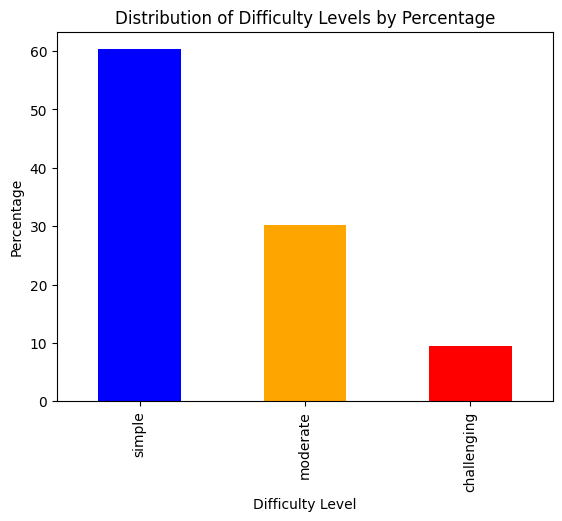

In [16]:
#difficulty distribution 
difficulty_counts = dev['difficulty'].value_counts(normalize=True) * 100
print(difficulty_counts*dev.shape[0]/100)
difficulty_counts.plot(kind='bar', color=['blue', 'orange', 'red'])

# Adding titles and labels
plt.title('Distribution of Difficulty Levels by Percentage')
plt.xlabel('Difficulty Level')
plt.ylabel('Percentage')

# Display the plot
plt.show()

## Subsampled Dev Set


To facilitate local tests, reduce costs, and maintain the distribution(by database) of the BIRD development set, we subsampled 10% of each database in the development set, resulting in the Subsampled Development Set. This SDS consists of 147 samples: 81 simple, 54 moderate, and 12 challenging questions.

In [13]:
sds=pd.read_json("C:/Users/yousf\Bureau\ConvergenceAI\CHESS_Impl\data\subsampled_dev_set\sub_sampled_bird_dev_set.json")
sds

,question_id,db_id,question,evidence,SQL,difficulty
0,9,california_schools,Among the schools with the average score in Ma...,,SELECT COUNT(T2.`School Code`) FROM satscores ...,simple
1,21,california_schools,In Los Angeles how many schools have more than...,,SELECT COUNT(CDSCode) FROM frpm WHERE `County ...,simple
2,25,california_schools,Name schools in Riverside which the average of...,Average of average math = sum(average math sco...,"SELECT T1.sname, T2.`Charter Funding Type` FRO...",moderate
3,35,california_schools,What is the administrator's email address of t...,Charted school means `Charter School (Y/N)` = ...,SELECT T2.AdmEmail1 FROM frpm AS T1 INNER JOIN...,moderate
4,40,california_schools,What is the telephone number for the school wi...,Fresno Unified is a name of district;,SELECT T2.Phone FROM satscores AS T1 INNER JOI...,moderate
...,...,...,...,...,...,...
142,1479,debit_card_specializing,Which year recorded the most consumption of ga...,The first 4 strings of the values in the table...,"SELECT SUBSTRING(T2.Date, 1, 4) FROM customers...",moderate
143,1485,debit_card_specializing,How much more was customer 7 consuming in Apri...,April 2013 refers to 201304 in the yearmonth.date,"SELECT SUM(IIF(CustomerID = 7, Consumption, 0)...",simple
144,1511,debit_card_specializing,"For the customers who paid in the euro, what i...",,SELECT AVG(T1.Price) FROM transactions_1k AS T...,simple
145,1527,debit_card_specializing,Which gas station has the highest amount of re...,,SELECT GasStationID FROM transactions_1k GROUP...,simple


difficulty
simple         55.102041
moderate       36.734694
challenging     8.163265
Name: proportion, dtype: float64


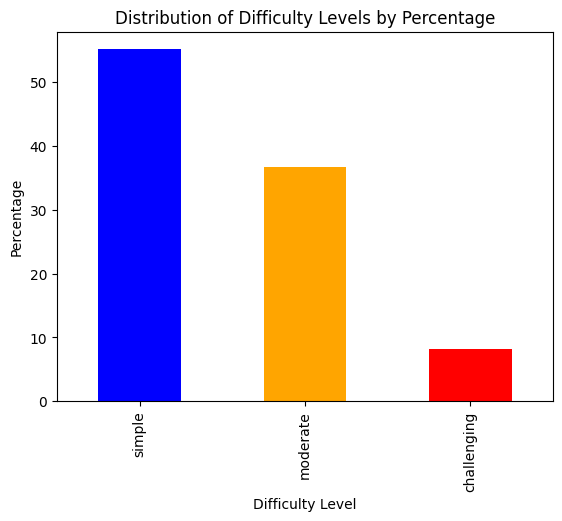

In [23]:
#difficulty distribution 
difficulty_counts = sds['difficulty'].value_counts(normalize=True) * 100
print(difficulty_counts)
difficulty_counts.plot(kind='bar', color=['blue', 'orange', 'red'])

# Adding titles and labels
plt.title('Distribution of Difficulty Levels by Percentage')
plt.xlabel('Difficulty Level')
plt.ylabel('Percentage')

# Display the plot
plt.show()

In [40]:
#database distribution
databases_counts = sds['db_id'].value_counts(normalize=True) * 100
print(databases_counts*sds.shape[0]/100)

db_id
card_games                 19.0
codebase_community         18.0
formula_1                  17.0
thrombosis_prediction      16.0
student_club               15.0
toxicology                 14.0
superhero                  12.0
european_football_2        12.0
financial                  10.0
california_schools          8.0
debit_card_specializing     6.0
Name: proportion, dtype: float64


 Let's try another subsampling and now focusing to maintain the distribution by difficulty not databases.
 We will subsample 10% of our dev set

In [35]:
#separate our dataset into 3 datasets based on question difficulty 
simple_dev=dev[dev['difficulty']=='simple']
moderate_dev=dev[dev['difficulty']=='moderate']
challenging_dev=dev[dev['difficulty']=='challenging']

#sample 10% of each dataset
simple_dev=simple_dev.sample(int(simple_dev.shape[0]/10),random_state=42)

moderate_dev=moderate_dev.sample(int(moderate_dev.shape[0]/10),random_state=42)

challenging_dev=challenging_dev.sample(int(challenging_dev.shape[0]/10),random_state=42)

# Concatenate the DataFrames
combined_dev = pd.concat([simple_dev, moderate_dev, challenging_dev])

# Shuffle the combined DataFrame
shuffled_dev = shuffle(combined_dev, random_state=42)

# Convert the DataFrame to JSON format
json_data = shuffled_dev.to_json("C:/Users\yousf\Bureau\ConvergenceAI\CHESS_Impl\data\subsampled_dev_set\sub_sampled_difficulty_dev_set.json",orient='records')


In [36]:
sdds=pd.read_json("C:/Users\yousf\Bureau\ConvergenceAI\CHESS_Impl\data\subsampled_dev_set\sub_sampled_difficulty_dev_set.json")
sdds

,question_id,db_id,question,evidence,SQL,difficulty
0,1116,european_football_2,List down most tallest players' name.,tallest refers to rank based on the height in ...,"SELECT player_name FROM (SELECT player_name, h...",simple
1,219,toxicology,What is the percentage of carcinogenic molecul...,label = '+' mean molecules are carcinogenic; t...,SELECT CAST(COUNT(DISTINCT CASE WHEN T2.label ...,challenging
2,1026,european_football_2,Which home team had lost the fewest matches in...,home team lost the matches refers to SUBTRACT(...,SELECT teamDetails.team_long_name FROM Match A...,moderate
3,1099,european_football_2,Which foot is preferred by Abdou Diallo?,Abdou Diallo refers to player_name = 'Abdou Di...,SELECT DISTINCT t2.preferred_foot FROM Player ...,simple
4,1297,thrombosis_prediction,For the patients whose total cholesterol is hi...,total cholesterol is higher than normal refers...,SELECT COUNT(T1.ID) FROM Patient AS T1 INNER J...,moderate
...,...,...,...,...,...,...
147,703,codebase_community,"Among the tags with tag ID below 15, how many ...",ID below 15 refers to Id < 15; have 20 count o...,SELECT COUNT(id) FROM tags WHERE Count <= 20 A...,simple
148,884,formula_1,List the names of all races that occurred in t...,earliest recorded year and month refers to yea...,"SELECT name FROM races WHERE STRFTIME('%Y', da...",moderate
149,365,card_games,"What is the type of card ""Benalish Knight""?",Benalish Knight' is the name of card;,SELECT DISTINCT T1.type FROM cards AS T1 INNER...,simple
150,32,california_schools,What is the eligible free or reduced price mea...,grades 1-12 means K-12; Eligible free or reduc...,SELECT CAST(T1.`FRPM Count (K-12)` AS REAL) / ...,moderate


In [38]:
sdds.shape

(152, 6)

In [39]:
#database distribution
databases_counts = sdds['db_id'].value_counts(normalize=True) * 100
print(databases_counts*sdds.shape[0]/100)

db_id
student_club               22.0
card_games                 19.0
toxicology                 19.0
formula_1                  18.0
codebase_community         17.0
superhero                  14.0
financial                  12.0
thrombosis_prediction      11.0
european_football_2         9.0
california_schools          7.0
debit_card_specializing     4.0
Name: proportion, dtype: float64


difficulty
simple         92.0
moderate       46.0
challenging    14.0
Name: proportion, dtype: float64


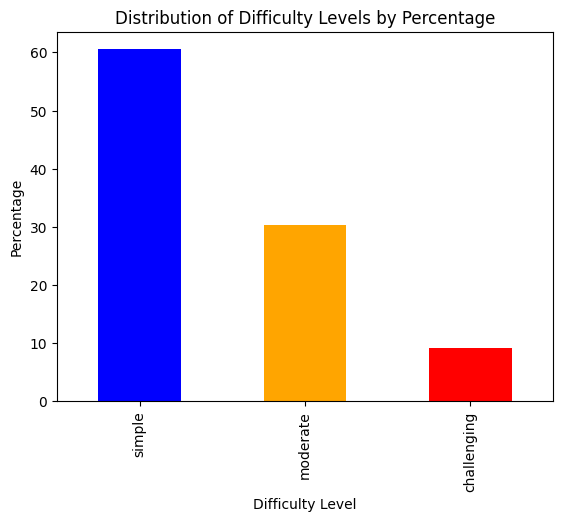

In [41]:
#difficulty distribution 
difficulty_counts = sdds['difficulty'].value_counts(normalize=True) * 100
print(difficulty_counts*sdds.shape[0]/100)
difficulty_counts.plot(kind='bar', color=['blue', 'orange', 'red'])

# Adding titles and labels
plt.title('Distribution of Difficulty Levels by Percentage')
plt.xlabel('Difficulty Level')
plt.ylabel('Percentage')

# Display the plot
plt.show()

The 'sub_sampled_difficulty_dev_set' contains 10% of the dev set which are 152 datapoints : 92 simple,46 moderate,14 challenging.
with same difficulty distribution as the dev set 